In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data_022.csv")

In [3]:
print(df.columns.tolist())

['Age', 'Gender:', 'Marital', 'Sleep', 'Screen', 'Activity', 'Entertainment', 'Smoking', 'Drinks', 'Disease', 'Study', 'S/W_load', 'Projects', 'Satisfaction', 'Friends', 'Income', 'Happiness', 'PSS_Q1', 'PSS_Q2', 'PSS_Q3', 'PSS_Q4', 'PSS_Q5', 'PSS_Q6', 'PSS_Q7', 'PSS_Q8', 'PSS_Q9', 'PSS_Q10', 'PSS_Q11', 'PSS_Q12', 'PSS_Q13', 'PSS_Q14']


In [4]:
#select all PSS columns
pss_columns = df.filter(like='PSS_')

# Create new column with row-wise sum
df['PSS_Total'] = pss_columns.sum(axis=1)

# Check result
df[['PSS_Total']].head()

,PSS_Total
0,28
1,35
2,27
3,24
4,30


In [5]:
def categorize_stress(score):
    if score <= 18:
        return 0      # Low Stress
    elif score <= 37:
        return 1      # Moderate Stress
    else:
        return 2      # High Stress

# Apply function
df['Stress_Level'] = df['PSS_Total'].apply(categorize_stress)

# Check result
df[['PSS_Total', 'Stress_Level']].head()

,PSS_Total,Stress_Level
0,28,1
1,35,1
2,27,1
3,24,1
4,30,1


In [6]:
df

,Age,Gender:,Marital,Sleep,Screen,Activity,Entertainment,Smoking,Drinks,Disease,...,PSS_Q7,PSS_Q8,PSS_Q9,PSS_Q10,PSS_Q11,PSS_Q12,PSS_Q13,PSS_Q14,PSS_Total,Stress_Level
0,2,1,2,1,3.0,3,3.0,0,0,0,...,2,1,1,2,2,4,1,2,28,1
1,2,1,1,2,3.0,3,3.0,0,0,0,...,1,2,1,2,4,4,1,3,35,1
2,2,1,2,1,2.0,2,2.5,2,0,3,...,2,1,3,3,0,4,2,2,27,1
3,2,1,2,1,1.5,2,0.0,0,0,0,...,2,1,1,1,3,3,1,1,24,1
4,2,1,2,1,3.0,3,3.0,0,0,0,...,1,4,1,2,4,4,4,2,30,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,1,1,1,0,1.0,2,2.0,0,0,3,...,0,0,0,0,0,4,4,0,16,0
348,2,1,1,0,1.5,2,1.0,2,1,0,...,0,1,0,0,1,1,2,2,11,0
349,2,1,3,2,1.0,3,3.0,2,0,3,...,4,4,4,4,4,4,0,4,44,2
350,1,1,2,3,2.0,2,3.0,2,0,0,...,4,4,4,4,4,4,0,4,44,2


In [7]:
df.columns = df.columns.str.strip()       # Delect Extra Space

In [8]:
df = df.drop(columns=[col for col in df.columns if col.startswith('PSS_')])   #Delect All Pss Question Column  

In [9]:
df.shape

(352, 18)

In [10]:
df.columns.tolist()

['Age',
 'Gender:',
 'Marital',
 'Sleep',
 'Screen',
 'Activity',
 'Entertainment',
 'Smoking',
 'Drinks',
 'Disease',
 'Study',
 'S/W_load',
 'Projects',
 'Satisfaction',
 'Friends',
 'Income',
 'Happiness',
 'Stress_Level']

In [11]:
X = df.drop(columns=['Stress_Level'])
y = df['Stress_Level']                       # target/label

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=40,
    stratify=y  
)

In [13]:
!pip install -U imbalanced-learn

Defaulting to user installation because normal site-packages is not writeable


In [14]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=3, random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train, y_train
)

In [15]:
#import sys
#!{sys.executable} -m pip install -U scikit-learn imbalanced-learn

from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=3, random_state=42)

X_train_smote, y_train_smote = smote.fit_resample(
    X_train, y_train
)

In [16]:
print("Before SMOTE:", y_train.value_counts())

Before SMOTE: Stress_Level
1    192
2     38
0     34
Name: count, dtype: int64


In [17]:
print("After SMOTE:", y_train_smote.value_counts())

After SMOTE: Stress_Level
1    192
0    192
2    192
Name: count, dtype: int64


## Balanced SVM Model

In [18]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [19]:
from sklearn.svm import SVC

svm = SVC(
    kernel='rbf',
    C=1.0,
    gamma='scale',
    class_weight='balanced',
    random_state=42,
    probability=True
)

svm.fit(X_train_scaled, y_train)

,"C C: float, default=1.0Regularization parameter. The strength of the regularization isinversely proportional to C. Must be strictly positive. The penaltyis a squared l2 penalty. For an intuitive visualization of the effectsof scaling the regularization parameter C, see:ref:`sphx_glr_auto_examples_svm_plot_svm_scale_c.py`.",1.0
,"kernel kernel: {'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'} or callable, default='rbf'Specifies the kernel type to be used in the algorithm. Ifnone is given, 'rbf' will be used. If a callable is given it is used topre-compute the kernel matrix from data matrices; that matrix should bean array of shape ``(n_samples, n_samples)``. For an intuitivevisualization of different kernel types see:ref:`sphx_glr_auto_examples_svm_plot_svm_kernels.py`.",'rbf'
,"degree degree: int, default=3Degree of the polynomial kernel function ('poly').Must be non-negative. Ignored by all other kernels.",3
,"gamma gamma: {'scale', 'auto'} or float, default='scale'Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.- if ``gamma='scale'`` (default) is passed then it uses 1 / (n_features * X.var()) as value of gamma,- if 'auto', uses 1 / n_features- if float, must be non-negative... versionchanged:: 0.22 The default value of ``gamma`` changed from 'auto' to 'scale'.",'scale'
,"coef0 coef0: float, default=0.0Independent term in kernel function.It is only significant in 'poly' and 'sigmoid'.",0.0
,"shrinking shrinking: bool, default=TrueWhether to use the shrinking heuristic.See the :ref:`User Guide `.",True
,"probability probability: bool, default=FalseWhether to enable probability estimates. This must be enabled priorto calling `fit`, will slow down that method as it internally uses5-fold cross-validation, and `predict_proba` may be inconsistent with`predict`. Read more in the :ref:`User Guide `.",True
,"tol tol: float, default=1e-3Tolerance for stopping criterion.",0.001
,"cache_size cache_size: float, default=200Specify the size of the kernel cache (in MB).",200
,"class_weight class_weight: dict or 'balanced', default=NoneSet the parameter C of class i to class_weight[i]*C forSVC. If not given, all classes are supposed to haveweight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.",'balanced'
,"verbose verbose: bool, default=FalseEnable verbose output. Note that this setting takes advantage of aper-process runtime setting in libsvm that, if enabled, may not workproperly in a multithreaded context.",False


In [20]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = svm.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))

Accuracy: 0.8181818181818182
Confusion Matrix:
 [[ 9  3  0]
 [ 2 54  8]
 [ 1  2  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75        12
           1       0.92      0.84      0.88        64
           2       0.53      0.75      0.62        12

    accuracy                           0.82        88
   macro avg       0.73      0.78      0.75        88
weighted avg       0.84      0.82      0.83        88



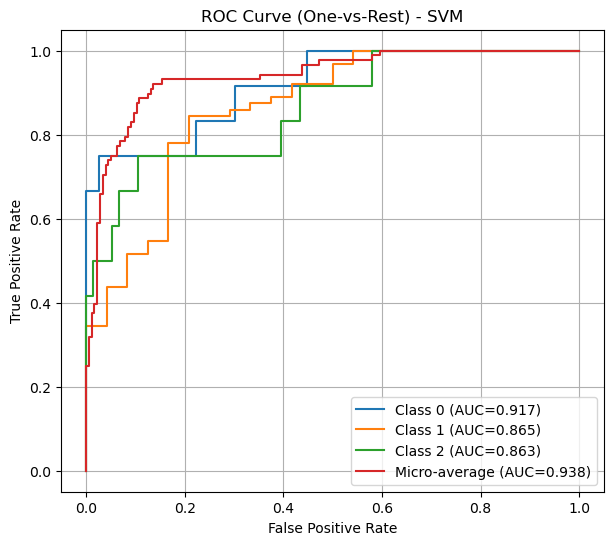

In [21]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Probabilities for each class
y_score = svm.predict_proba(X_test_scaled)  # shape: (n_samples, 3)

# Binarize true labels for multiclass ROC
classes = np.array([0, 1, 2])
y_test_bin = label_binarize(y_test, classes=classes)  # shape: (n_samples, 3)

# ROC per class
fpr, tpr, roc_auc = {}, {}, {}
for i, c in enumerate(classes):
    fpr[c], tpr[c], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[c] = auc(fpr[c], tpr[c])

# Micro-average ROC (overall)
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

plt.figure(figsize=(7, 6))
for c in classes:
    plt.plot(fpr[c], tpr[c], label=f"Class {c} (AUC={roc_auc[c]:.3f})")

plt.plot(fpr_micro, tpr_micro, label=f"Micro-average (AUC={auc_micro:.3f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest) - SVM")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

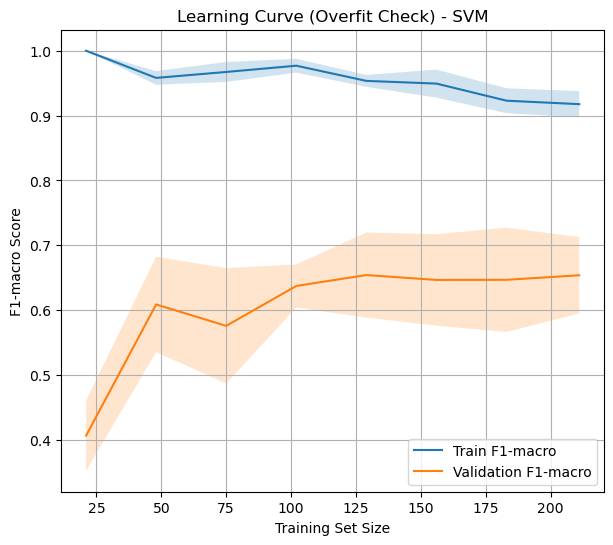

In [22]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import learning_curve, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(
    estimator=svm,
    X=X_train_scaled,
    y=y_train,
    cv=cv,
    scoring="f1_macro",            
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_mean   = val_scores.mean(axis=1)
val_std    = val_scores.std(axis=1)

plt.figure(figsize=(7, 6))
plt.plot(train_sizes, train_mean, label="Train F1-macro")
plt.plot(train_sizes, val_mean, label="Validation F1-macro")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2)

plt.xlabel("Training Set Size")
plt.ylabel("F1-macro Score")
plt.title("Learning Curve (Overfit Check) - SVM")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#log_model = LogisticRegression(max_iter=2000, multi_class="auto", solver="lbfgs", random_state=40)
log_model = LogisticRegression(max_iter=2000, solver="lbfgs", random_state=40)
log_model.fit(X_train, y_train)


,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",40
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

In [24]:
y_pred_log = log_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))

Accuracy: 0.8181818181818182

Confusion Matrix:
 [[ 5  7  0]
 [ 0 59  5]
 [ 0  4  8]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.42      0.59        12
           1       0.84      0.92      0.88        64
           2       0.62      0.67      0.64        12

    accuracy                           0.82        88
   macro avg       0.82      0.67      0.70        88
weighted avg       0.83      0.82      0.81        88



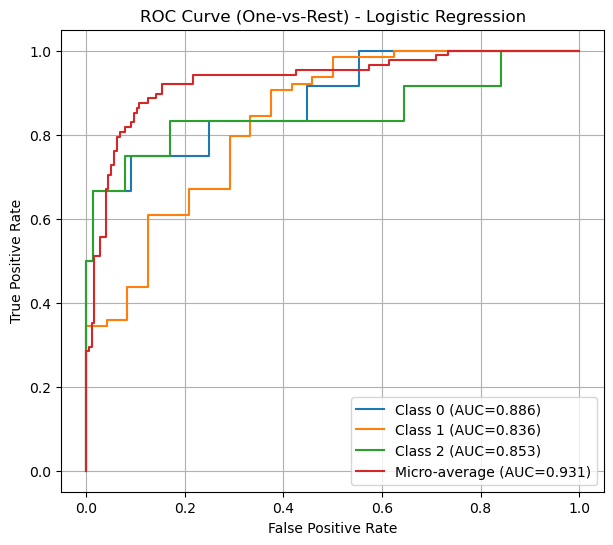

In [25]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Probability scores
y_score = log_model.predict_proba(X_test)   # shape: (n_samples, 3)

# Binarize true labels
classes = np.array([0, 1, 2])
y_test_bin = label_binarize(y_test, classes=classes)

# ROC for each class
fpr, tpr, roc_auc = {}, {}, {}
for i, c in enumerate(classes):
    fpr[c], tpr[c], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[c] = auc(fpr[c], tpr[c])

# Micro-average ROC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

plt.figure(figsize=(7, 6))
for c in classes:
    plt.plot(fpr[c], tpr[c], label=f"Class {c} (AUC={roc_auc[c]:.3f})")

plt.plot(fpr_micro, tpr_micro, label=f"Micro-average (AUC={auc_micro:.3f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest) - Logistic Regression")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

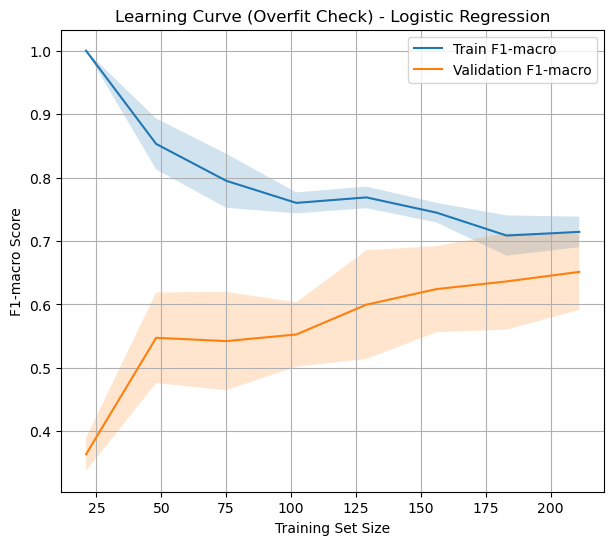

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(
    estimator=log_model,
    X=X_train,
    y=y_train,
    cv=cv,
    scoring="f1_macro",
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_mean   = val_scores.mean(axis=1)
val_std    = val_scores.std(axis=1)

plt.figure(figsize=(7, 6))
plt.plot(train_sizes, train_mean, label="Train F1-macro")
plt.plot(train_sizes, val_mean, label="Validation F1-macro")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2)

plt.xlabel("Training Set Size")
plt.ylabel("F1-macro Score")
plt.title("Learning Curve (Overfit Check) - Logistic Regression")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## HistGradient

In [27]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

hgb_model = HistGradientBoostingClassifier(
    random_state=42,
    max_depth=6,
    learning_rate=0.1,
    max_iter=300
)

hgb_model.fit(X_train, y_train)

,"loss loss: {'log_loss'}, default='log_loss'The loss function to use in the boosting process.For binary classification problems, 'log_loss' is also known as logistic loss,binomial deviance or binary crossentropy. Internally, the model fits one treeper boosting iteration and uses the logistic sigmoid function (expit) asinverse link function to compute the predicted positive class probability.For multiclass classification problems, 'log_loss' is also known as multinomialdeviance or categorical crossentropy. Internally, the model fits one tree perboosting iteration and per class and uses the softmax function as inverse linkfunction to compute the predicted probabilities of the classes.",'log_loss'
,"learning_rate learning_rate: float, default=0.1The learning rate, also known as *shrinkage*. This is used as amultiplicative factor for the leaves values. Use ``1`` for noshrinkage.",0.1
,"max_iter max_iter: int, default=100The maximum number of iterations of the boosting process, i.e. themaximum number of trees for binary classification. For multiclassclassification, `n_classes` trees per iteration are built.",300
,"max_leaf_nodes max_leaf_nodes: int or None, default=31The maximum number of leaves for each tree. Must be strictly greaterthan 1. If None, there is no maximum limit.",31
,"max_depth max_depth: int or None, default=NoneThe maximum depth of each tree. The depth of a tree is the number ofedges to go from the root to the deepest leaf.Depth isn't constrained by default.",6
,"min_samples_leaf min_samples_leaf: int, default=20The minimum number of samples per leaf. For small datasets with lessthan a few hundred samples, it is recommended to lower this valuesince only very shallow trees would be built.",20
,"l2_regularization l2_regularization: float, default=0The L2 regularization parameter penalizing leaves with small hessians.Use ``0`` for no regularization (default).",0.0
,"max_features max_features: float, default=1.0Proportion of randomly chosen features in each and every node split.This is a form of regularization, smaller values make the trees weakerlearners and might prevent overfitting.If interaction constraints from `interaction_cst` are present, only allowedfeatures are taken into account for the subsampling... versionadded:: 1.4",1.0
,"max_bins max_bins: int, default=255The maximum number of bins to use for non-missing values. Beforetraining, each feature of the input array `X` is binned intointeger-valued bins, which allows for a much faster training stage.Features with a small number of unique values may use less than``max_bins`` bins. In addition to the ``max_bins`` bins, one more binis always reserved for missing values. Must be no larger than 255.",255
,"categorical_features categorical_features: array-like of {bool, int, str} of shape (n_features) or shape (n_categorical_features,), default='from_dtype'Indicates the categorical features.- None : no feature will be considered categorical.- boolean array-like : boolean mask indicating categorical features.- integer array-like : integer indices indicating categorical features.- str array-like: names of categorical features (assuming the training data has feature names).- `""from_dtype""`: dataframe columns with dtype ""category"" are considered to be categorical features. The input must be an object exposing a ``__dataframe__`` method such as pandas or polars DataFrames to use this feature.For each categorical feature, there must be at most `max_bins` uniquecategories. Negative values for categorical features encoded as numericdtypes are treated as missing values. All categorical values areconverted to floating point numbers. This means that categorical valuesof 1.0 and 1 are treated as the same category.Read more in the :ref:`User Guide `... versionadded:: 0.24.. versionchanged:: 1.2 Added support for feature names... versionchanged:: 1.4 Added `""from_dtype""` option... versionchanged:: 1.6 The default value changed from `None` to `""from_dtype""`.",'from_dtype

In [28]:
y_pred_hgb = hgb_model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred_hgb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_hgb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_hgb))

Accuracy: 0.8295454545454546

Confusion Matrix:
 [[ 7  5  0]
 [ 1 57  6]
 [ 0  3  9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.58      0.70        12
           1       0.88      0.89      0.88        64
           2       0.60      0.75      0.67        12

    accuracy                           0.83        88
   macro avg       0.78      0.74      0.75        88
weighted avg       0.84      0.83      0.83        88



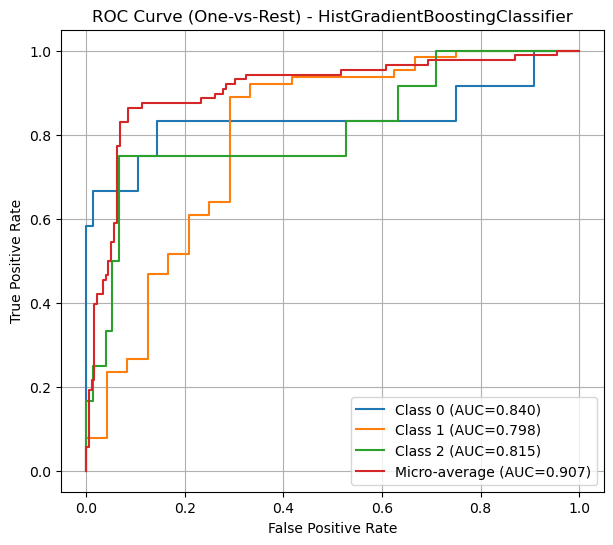

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

# Probability scores
y_score = hgb_model.predict_proba(X_test)   # shape: (n_samples, 3)

# Binarize true labels
classes = np.array([0, 1, 2])
y_test_bin = label_binarize(y_test, classes=classes)

# ROC per class
fpr, tpr, roc_auc = {}, {}, {}
for i, c in enumerate(classes):
    fpr[c], tpr[c], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[c] = auc(fpr[c], tpr[c])

# Micro-average ROC
fpr_micro, tpr_micro, _ = roc_curve(y_test_bin.ravel(), y_score.ravel())
auc_micro = auc(fpr_micro, tpr_micro)

plt.figure(figsize=(7, 6))
for c in classes:
    plt.plot(fpr[c], tpr[c], label=f"Class {c} (AUC={roc_auc[c]:.3f})")

plt.plot(fpr_micro, tpr_micro, label=f"Micro-average (AUC={auc_micro:.3f})")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve (One-vs-Rest) - HistGradientBoostingClassifier")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

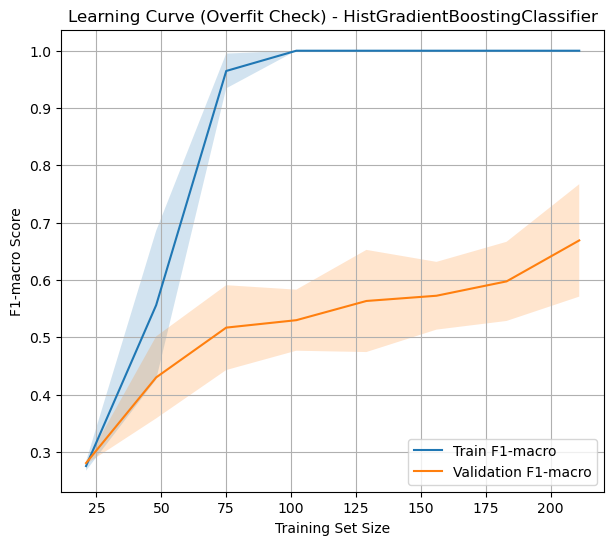

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve, StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

train_sizes, train_scores, val_scores = learning_curve(
    estimator=hgb_model,
    X=X_train,
    y=y_train,
    cv=cv,
    scoring="f1_macro",            
    train_sizes=np.linspace(0.1, 1.0, 8),
    n_jobs=-1
)

train_mean = train_scores.mean(axis=1)
train_std  = train_scores.std(axis=1)
val_mean   = val_scores.mean(axis=1)
val_std    = val_scores.std(axis=1)

plt.figure(figsize=(7, 6))
plt.plot(train_sizes, train_mean, label="Train F1-macro")
plt.plot(train_sizes, val_mean, label="Validation F1-macro")

plt.fill_between(train_sizes, train_mean-train_std, train_mean+train_std, alpha=0.2)
plt.fill_between(train_sizes, val_mean-val_std, val_mean+val_std, alpha=0.2)

plt.xlabel("Training Set Size")
plt.ylabel("F1-macro Score")
plt.title("Learning Curve (Overfit Check) - HistGradientBoostingClassifier")
plt.legend(loc="best")
plt.grid(True)
plt.show()

## Ensemble_model

In [31]:
from sklearn.ensemble import HistGradientBoostingClassifier, VotingClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [32]:
num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]


preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            ("sc", StandardScaler())
        ]), num_cols),
        ("cat", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("oh", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop"
)

voter = VotingClassifier(
    estimators=[
        ("svm", svm),
        ("lr", log_model),
        ("hgb", hgb_model)
    ],
    voting="hard"
)

ensemble_model = Pipeline([
    ("prep", preprocess),
    ("vote", voter)
])

In [33]:
ensemble_model.fit(X_train, y_train)
pred = ensemble_model.predict(X_test)

print("Hard Voting:")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Accuracy   :", accuracy_score(y_test, pred))

#print("Macro F1   :", f1_score(y_test, pred, average="macro"))
#print("Weighted F1:", f1_score(y_test, pred, average="weighted"))

Hard Voting:
Confusion Matrix:
 [[ 7  5  0]
 [ 0 58  6]
 [ 0  3  9]]
Accuracy   : 0.8409090909090909


In [34]:
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, classification_report

num_cols = X.select_dtypes(include=["number"]).columns.tolist()
cat_cols = [c for c in X.columns if c not in num_cols]

preprocess = ColumnTransformer(
    transformers=[
        ("num", Pipeline([
            ("imp", SimpleImputer(strategy="median")),
            ("sc", StandardScaler())
        ]), num_cols),
        ("cat", Pipeline([
            ("imp", SimpleImputer(strategy="most_frequent")),
            ("oh", OneHotEncoder(handle_unknown="ignore"))
        ]), cat_cols),
    ],
    remainder="drop"
)


soft_voter = VotingClassifier(
    estimators=[("svm", svm), ("lr", log_model), ("hgb", hgb_model)],
    voting="soft"
)

soft_ensemble_model = Pipeline([
    ("prep", preprocess),
    ("vote", soft_voter)
])


soft_ensemble_model.fit(X_train, y_train)
pred = soft_ensemble_model.predict(X_test)

print("Soft Voting:")
print("Confusion Matrix:\n", confusion_matrix(y_test, pred))
print("Accuracy   :", accuracy_score(y_test, pred))


print("Macro F1   :", f1_score(y_test, pred, average="macro"))
print("Weighted F1:", f1_score(y_test, pred, average="weighted"))

Soft Voting:
Confusion Matrix:
 [[ 7  5  0]
 [ 0 59  5]
 [ 0  3  9]]
Accuracy   : 0.8522727272727273
Macro F1   : 0.7766377187831587
Weighted F1: 0.8499846878713893


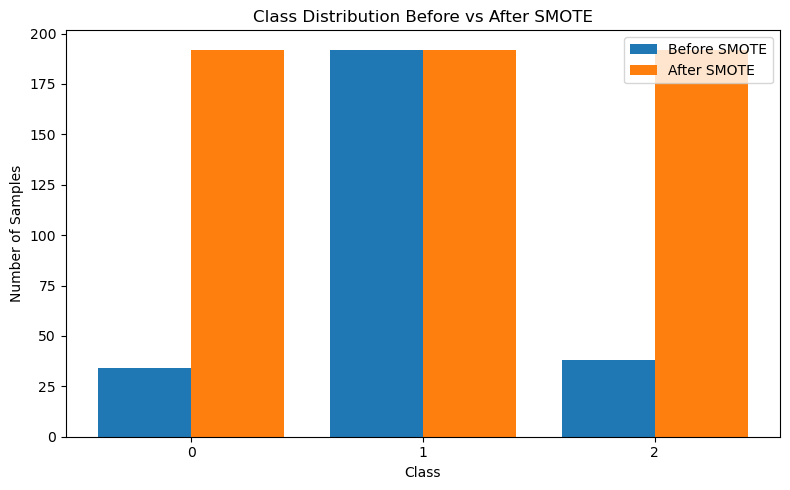

In [35]:
from collections import Counter
import matplotlib.pyplot as plt

# BEFORE SMOTE
before = Counter(y_train)

# AFTER SMOTE (use your actual variable name)
after = Counter(y_train_smote)   # or y_resampled / y_train_resampled

labels = sorted(before.keys())
before_counts = [before[l] for l in labels]
after_counts  = [after[l]  for l in labels]

x = range(len(labels))
width = 0.4

plt.figure(figsize=(8,5))
plt.bar([i - width/2 for i in x], before_counts, width=width, label="Before SMOTE")
plt.bar([i + width/2 for i in x], after_counts,  width=width, label="After SMOTE")

plt.xticks(list(x), labels)
plt.xlabel("Class")
plt.ylabel("Number of Samples")
plt.title("Class Distribution Before vs After SMOTE")
plt.legend()
plt.tight_layout()
plt.show()

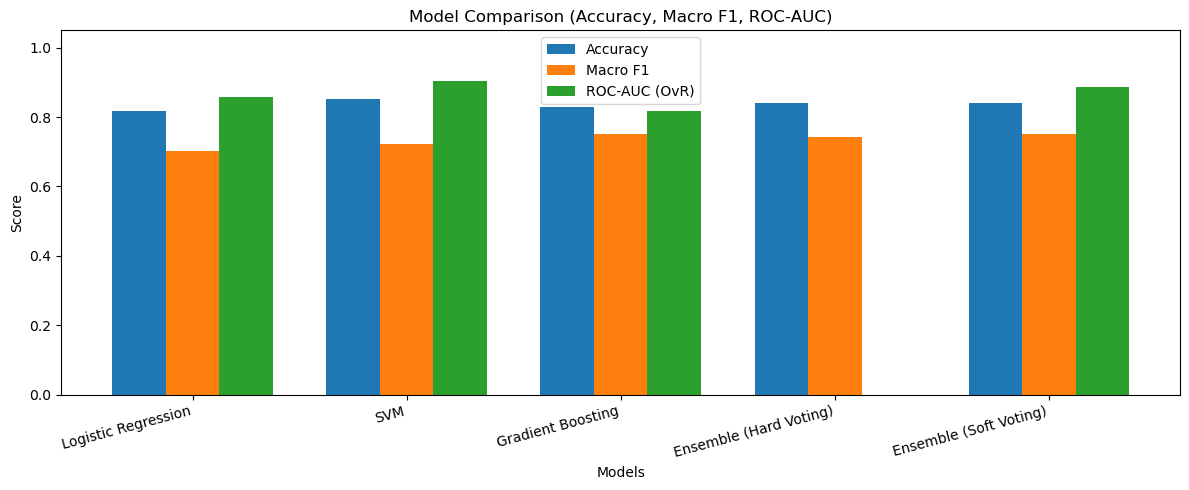

In [44]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import VotingClassifier

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC


# -----------------------------
# 0) Make SVM consistent (IMPORTANT)
# -----------------------------
# This fixes the mismatch: SVM will scale internally, so you can always pass X_test (NOT X_test_scaled).
# Also enables predict_proba for Soft Voting + ROC-AUC.
svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf", probability=True, random_state=42))
])

# Fit SVM pipeline on raw X_train
svm_pipe.fit(X_train, y_train)


# -----------------------------
# 1) Metrics helpers
# -----------------------------
def multiclass_auc(model, X_test, y_test):
    classes = np.unique(y_test)
    y_bin = label_binarize(y_test, classes=classes)

    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        return np.nan

    return roc_auc_score(y_bin, y_score, multi_class="ovr", average="macro")


def get_scores_mc(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    f1  = f1_score(y_test, y_pred, average="macro")
    auc = multiclass_auc(model, X_test, y_test)
    return acc, f1, auc


# -----------------------------
# 2) Build ensemble models (use SAME feature space: raw X_train/X_test)
# -----------------------------
ensemble_hard = VotingClassifier(
    estimators=[
        ("lr",  log_model),
        ("svm", svm_pipe),
        ("hgb", hgb_model),
    ],
    voting="hard"
)

ensemble_soft = VotingClassifier(
    estimators=[
        ("lr",  log_model),
        ("svm", svm_pipe),
        ("hgb", hgb_model),
    ],
    voting="soft"
)

ensemble_hard.fit(X_train, y_train)
ensemble_soft.fit(X_train, y_train)


# -----------------------------
# 3) Compare all models (NOW: always use X_test)
# -----------------------------
models = {
    "Logistic Regression": log_model,
    "SVM": svm_pipe,                     # <-- use pipeline (fixed)
    "Gradient Boosting": hgb_model,
    "Ensemble (Hard Voting)": ensemble_hard,
    "Ensemble (Soft Voting)": ensemble_soft
}

names, accs, f1s, aucs = [], [], [], []
for name, model in models.items():
    acc, f1, auc = get_scores_mc(model, X_test, y_test)
    names.append(name); accs.append(acc); f1s.append(f1); aucs.append(auc)


# -----------------------------
# 4) Plot
# -----------------------------
x = np.arange(len(names))
w = 0.25

plt.figure(figsize=(12, 5))
plt.bar(x - w, accs, width=w, label="Accuracy")
plt.bar(x,     f1s,  width=w, label="Macro F1")
plt.bar(x + w, aucs, width=w, label="ROC-AUC (OvR)")

plt.xticks(x, names, rotation=15, ha="right")
plt.ylim(0, 1.05)
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Comparison (Accuracy, Macro F1, ROC-AUC)")
plt.legend()
plt.tight_layout()
plt.show()

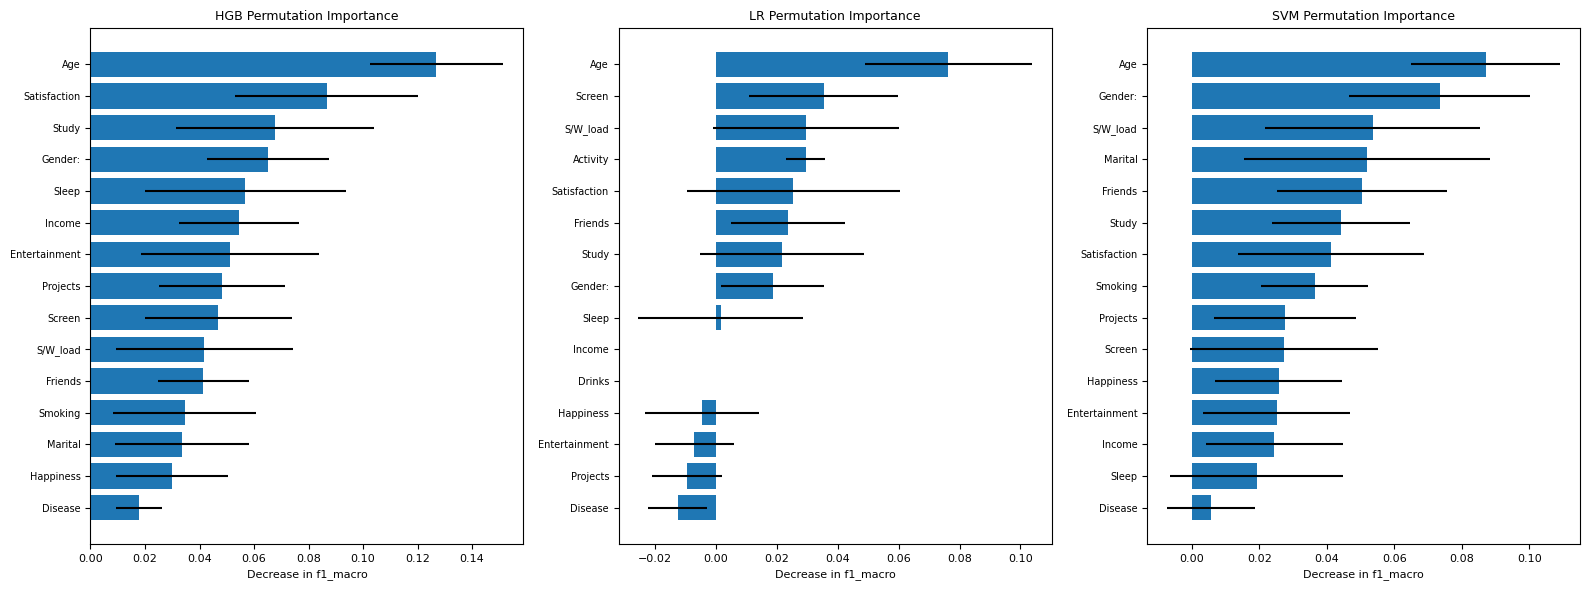

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.inspection import permutation_importance

# -----------------------------
# 1) Feature names (safe)
# -----------------------------
# Use X_train if you have it, otherwise X_test
if "X_train" in globals() and hasattr(X_train, "columns"):
    feature_names = X_train.columns.to_list()
elif "X_test" in globals() and hasattr(X_test, "columns"):
    feature_names = X_test.columns.to_list()
else:
    # fallback (if your X are numpy arrays)
    feature_names = [f"f{i}" for i in range(X_test.shape[1])]

# -----------------------------
# 2) Compute permutation importance
# -----------------------------
def perm_importance_df(model, X_eval, y_eval, feature_names,
                       scoring="f1_macro", n_repeats=30, random_state=42):
    r = permutation_importance(
        model,
        X_eval,
        y_eval,
        scoring=scoring,
        n_repeats=n_repeats,
        random_state=random_state,
        n_jobs=-1
    )
    return (pd.DataFrame({
        "feature": feature_names,
        "importance_mean": r.importances_mean,
        "importance_std": r.importances_std
    }).sort_values("importance_mean", ascending=False).reset_index(drop=True))

# IMPORTANT:
# If your SVM is trained on scaled data -> use X_test_scaled
# LR + HGB -> use X_test
models_for_perm = [
    ("SVM", svm, X_test_scaled),
    ("Logistic Regression", log_model, X_test),
    ("HistGradientBoosting", hgb_model, X_test),
]

all_importances = {}
for name, model, X_eval in models_for_perm:
    all_importances[name] = perm_importance_df(
        model=model,
        X_eval=X_eval,
        y_eval=y_test,
        feature_names=feature_names,
        scoring="f1_macro",
        n_repeats=30,
        random_state=42
    )

# -----------------------------
# 3) Plot 1x3 (row wise)
# -----------------------------
def plot_perm_importance_ax(ax, df_imp, title, top_n=15, scoring="f1_macro",
                            tick_fs=7, title_fs=9):
    show = df_imp.head(top_n).iloc[::-1]
    ax.barh(show["feature"], show["importance_mean"], xerr=show["importance_std"])
    ax.set_title(title, fontsize=title_fs)
    ax.set_xlabel(f"Decrease in {scoring}", fontsize=8)
    ax.tick_params(axis='y', labelsize=tick_fs)
    ax.tick_params(axis='x', labelsize=8)

top_n = 15

fig, axes = plt.subplots(1, 3, figsize=(16, 6))

plot_perm_importance_ax(axes[0], all_importances["HistGradientBoosting"], "HGB Permutation Importance", top_n=top_n)
plot_perm_importance_ax(axes[1], all_importances["Logistic Regression"], "LR Permutation Importance", top_n=top_n)
plot_perm_importance_ax(axes[2], all_importances["SVM"], "SVM Permutation Importance", top_n=top_n)

plt.tight_layout()

# Save high-quality for thesis
plt.savefig("Permutation_Importance_1x3.png", dpi=300, bbox_inches="tight")
plt.savefig("Permutation_Importance_1x3.pdf", bbox_inches="tight")

plt.show()

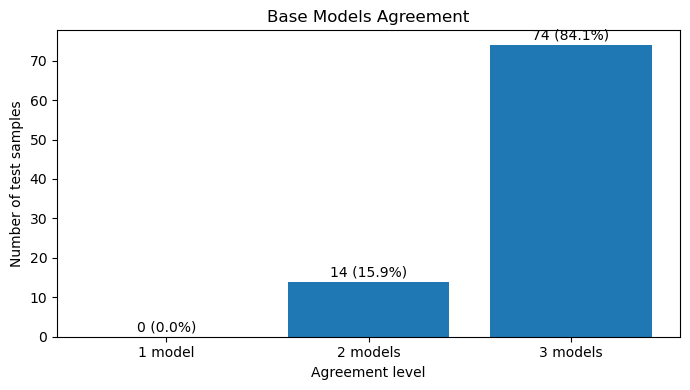

Agreement counts: {'1': np.int64(0), '2': np.int64(14), '3': np.int64(74)}


In [39]:
import numpy as np
import matplotlib.pyplot as plt

base_models = {
    "LR": log_model,
    "SVM": svm_pipe,
    "HGB": hgb_model
}

preds = {name: m.predict(X_test) for name, m in base_models.items()}
P = np.vstack([preds[k] for k in base_models.keys()])  # (3, n_samples)

agree_count = []
for j in range(P.shape[1]):
    vals, counts = np.unique(P[:, j], return_counts=True)
    agree_count.append(np.max(counts))  # 2 or 3 (or 1)

agree_count = np.array(agree_count)

# count 1,2,3
counts = [np.sum(agree_count == i) for i in [1,2,3]]
total = len(agree_count)
perc = [c/total*100 for c in counts]

plt.figure(figsize=(7,4))
bars = plt.bar([1,2,3], counts)
plt.xticks([1,2,3], ["1 model", "2 models", "3 models"])
plt.xlabel("Agreement level")
plt.ylabel("Number of test samples")
plt.title("Base Models Agreement")

# add labels
for b, c, p in zip(bars, counts, perc):
    plt.text(b.get_x() + b.get_width()/2, c + 0.5, f"{c} ({p:.1f}%)",
             ha="center", va="bottom")

plt.tight_layout()
plt.show()

print("Agreement counts:", {"1":counts[0], "2":counts[1], "3":counts[2]})

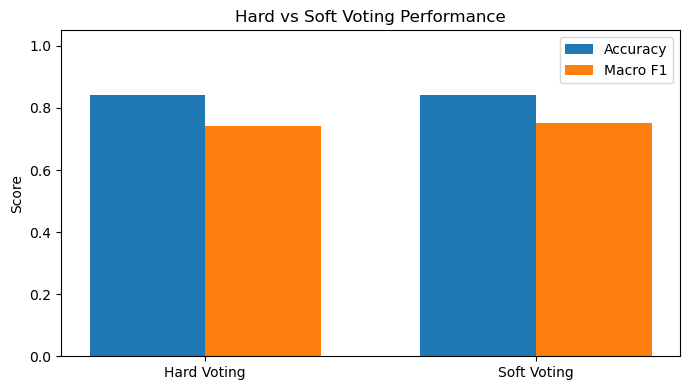

In [40]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score

def get_acc_f1(model, X_test, y_test):
    pred = model.predict(X_test)
    return accuracy_score(y_test, pred), f1_score(y_test, pred, average="macro")

hard_acc, hard_f1 = get_acc_f1(ensemble_hard, X_test, y_test)
soft_acc, soft_f1 = get_acc_f1(ensemble_soft, X_test, y_test)

labels = ["Hard Voting", "Soft Voting"]
accs = [hard_acc, soft_acc]
f1s  = [hard_f1,  soft_f1]

x = range(len(labels))
w = 0.35

plt.figure(figsize=(7, 4))
plt.bar([i - w/2 for i in x], accs, width=w, label="Accuracy")
plt.bar([i + w/2 for i in x], f1s,  width=w, label="Macro F1")
plt.xticks(list(x), labels)
plt.ylim(0, 1.05)
plt.ylabel("Score")
plt.title("Hard vs Soft Voting Performance")
plt.legend()
plt.tight_layout()
plt.show()

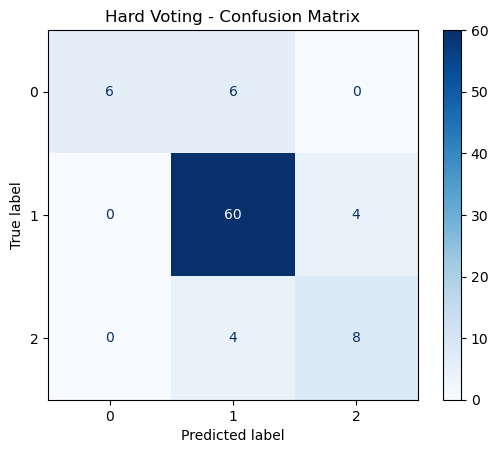

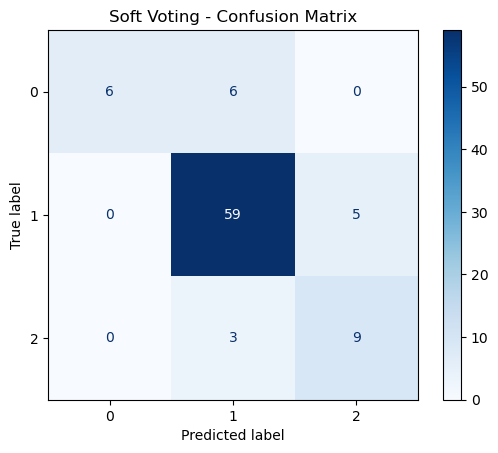

In [41]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

def plot_cm(model, X_test, y_test, title="Confusion Matrix"):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues", values_format="d")
    plt.title(title)
    plt.grid(False)
    plt.show()

plot_cm(ensemble_hard, X_test, y_test, "Hard Voting - Confusion Matrix")
plot_cm(ensemble_soft, X_test, y_test, "Soft Voting - Confusion Matrix")

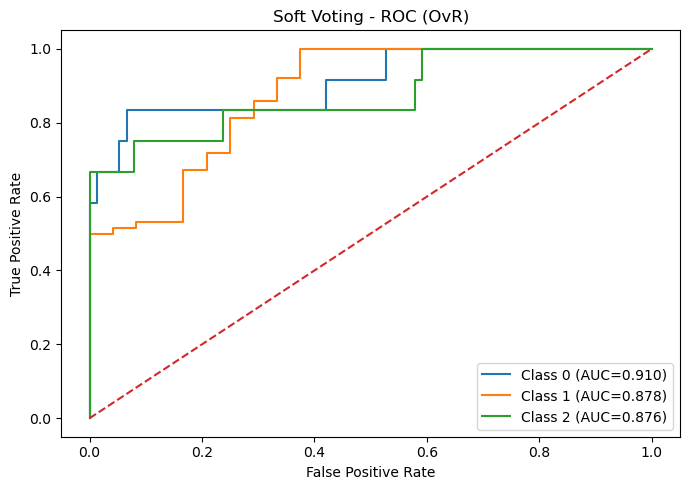

[SKIP] Hard Voting - ROC (OvR): model has no predict_proba/decision_function


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def plot_multiclass_roc(model, X_test, y_test, title="ROC Curve (OvR)"):
    classes = np.unique(y_test)
    y_bin = label_binarize(y_test, classes=classes)

    # scores: predict_proba OR decision_function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
        if y_score.ndim == 1:  # binary special-case
            y_score = np.column_stack([1 - y_score, y_score])
    else:
        print(f"[SKIP] {title}: model has no predict_proba/decision_function")
        return

    plt.figure(figsize=(7, 5))
    for i, c in enumerate(classes):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f"Class {c} (AUC={roc_auc:.3f})")

    plt.plot([0, 1], [0, 1], linestyle="--")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_multiclass_roc(ensemble_soft, X_test, y_test, "Soft Voting - ROC (OvR)")
plot_multiclass_roc(ensemble_hard, X_test, y_test, "Hard Voting - ROC (OvR)")